In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from matplotlib.backends.backend_agg import FigureCanvasAgg
%matplotlib inline

In [2]:
# please put data in data/Car_accident_detection/Dataset/manual/segments_3/
cap = cv2.VideoCapture("data/Car_accident_detection/Dataset/manual/segments_3/000001.mp4")
cap.isOpened()

True

In [3]:
annotations = json.load(open("000001.json"))

In [4]:
annotations[0]

{u'color': u'#d16159',
 u'id': u'_m4xa5xakz',
 u'keyframes': [{u'continueInterpolation': True,
   u'frame': 0,
   u'h': 96.13674959864142,
   u'state': u'Moving',
   u'w': 478.65859232175507,
   u'x': 1.1220292504570466,
   u'y': -4.606946983546607},
  {u'continueInterpolation': True,
   u'frame': 671,
   u'h': 90.01137775438086,
   u'state': u'Moving',
   u'w': 479.90859232175507,
   u'x': -0.7371078053805178,
   u'y': 2.0935606306665875},
  {u'continueInterpolation': True,
   u'frame': 673,
   u'h': 384.8677140656465,
   u'state': u'Moving',
   u'w': 481.78359232175507,
   u'x': -2.0029707495429534,
   u'y': -4.606946983546607},
  {u'continueInterpolation': True,
   u'frame': 689,
   u'h': 384.8677140656465,
   u'state': u'Moving',
   u'w': 479.28359232175507,
   u'x': 0.4970292504570466,
   u'y': -4.606946983546607}],
 u'type': u'Mask'}

In [5]:
def get_annotations_by_frame_id(fid, annotations):
    results = []
    for a in annotations:
        keyframes = a["keyframes"]
        for kf in keyframes:
            if kf["frame"] == fid:
                results.append({"type": a["type"], "data": kf})
    return results

In [6]:
boxes = get_annotations_by_frame_id(0, annotations)
boxes

[{'data': {u'continueInterpolation': True,
   u'frame': 0,
   u'h': 96.13674959864142,
   u'state': u'Moving',
   u'w': 478.65859232175507,
   u'x': 1.1220292504570466,
   u'y': -4.606946983546607},
  'type': u'Mask'},
 {'data': {u'continueInterpolation': True,
   u'frame': 0,
   u'h': 71.07861060329068,
   u'state': u'',
   u'w': 91.48080438756858,
   u'x': 391.5904936014625,
   u'y': 92.79707495429616},
  'type': u'Mask'},
 {'data': {u'continueInterpolation': True,
   u'frame': 0,
   u'h': 54.5258226691042,
   u'state': u'Moving',
   u'w': 70.05598720292505,
   u'x': 2.9970292504570395,
   u'y': 127.67824497257772},
  'type': u'Car'},
 {'data': {u'continueInterpolation': True,
   u'frame': 0,
   u'h': 28.299817184643516,
   u'state': u'Moving',
   u'w': 42.939899451553934,
   u'x': 0.4970292504570395,
   u'y': 98.72029250457038},
  'type': u'Car'},
 {'data': {u'continueInterpolation': True,
   u'frame': 0,
   u'h': 125.0457038391225,
   u'state': u'Moving',
   u'w': 123.7294332723948

In [7]:
# visualize frame 0
_, img = cap.read()

In [8]:
for bb in boxes:
    box = bb["data"]
    if bb["type"] == "Mask":
        color = (0,0,0)
        type  = -1
    else:
        color = (0,255,0)
        type  =  1
    cv2.rectangle(img, (max(0, int(box["x"])), max(0,int(box["y"]))), 
                  (int(box["x"]+box["w"]), int(box["y"] + box["h"])), 
                  color, type)
fig = plt.Figure(dpi=200)
canvas = FigureCanvasAgg(fig)
ax = fig.add_subplot(111)
ax.imshow(img[:,:,[2,1,0]])
ax.set_axis_off()

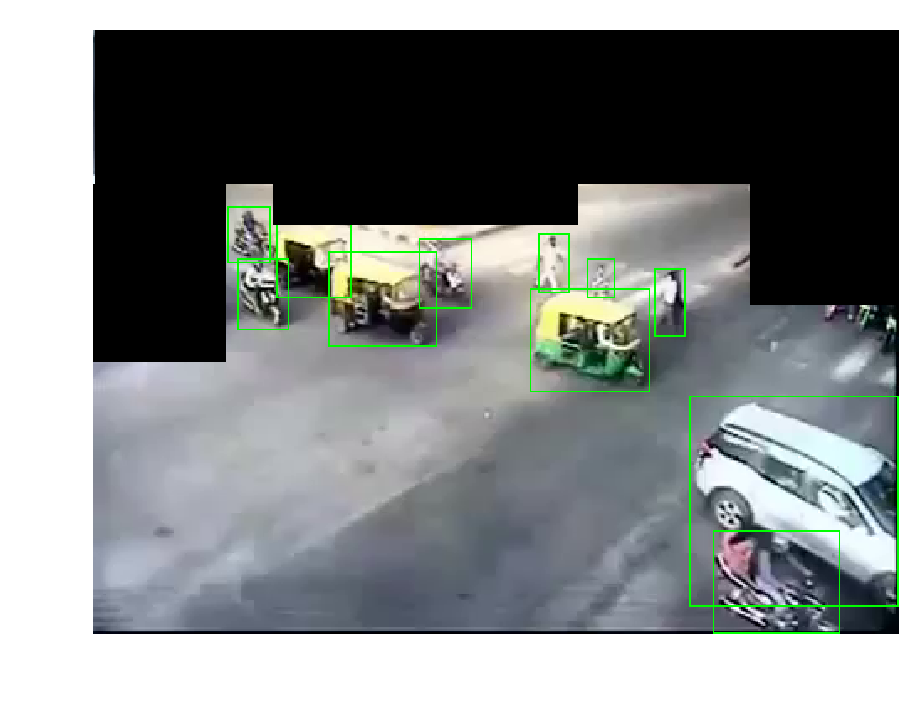

In [9]:
fig